# Codificacion FRQI a 4x4

/opt/anaconda3/envs/qiskit-stable/lib/python3.11/site-packages/numpy/linalg/linalg.py:2180: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/opt/anaconda3/envs/qiskit-stable/lib/python3.11/site-packages/numpy/linalg/linalg.py:2180: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


Error cuadrático medio (MSE): 0.007808631375342424


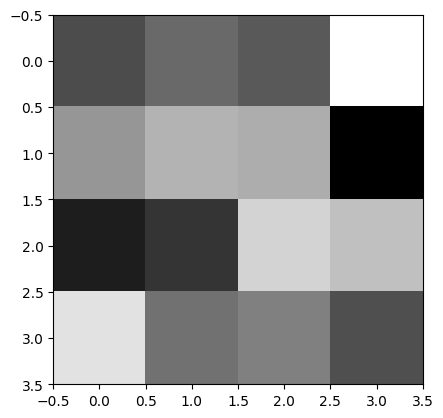

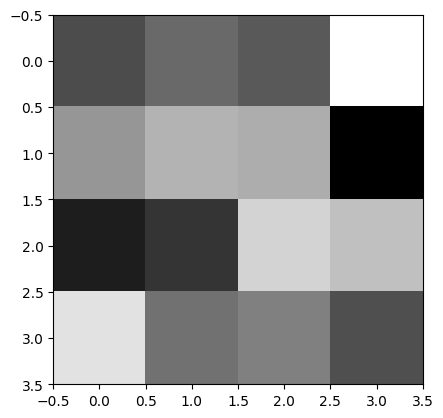

In [6]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

class FRQIEncoder:
    def __init__(self, image_path):
        self.image_path = image_path
        self.qubits = 5  # 4 para posiciones, 1 para la intensidad
        self.qc = QuantumCircuit(self.qubits, self.qubits)
        self.backend_sim = AerSimulator()  # Usamos AerSimulator aquí

    def image_normalization(self):
        image = Image.open(self.image_path).convert('LA')
        image = image.resize((4, 4))  # Redimensionar a 4x4
        image_array = np.array(image)[:, :, 0] / 255.0  # Escala de grises y normalización
        return np.arcsin(image_array.flatten())  # Normalización [0, π/2]

    def apply_hadamard(self):
        self.qc.h(range(1, self.qubits))  # Aplicar Hadamard a qubits 1 a 4

    def apply_frqi_encoding(self, pixel_data):
        for i, pixel in enumerate(pixel_data):
            if pixel != 0:
                self.c10mary(2 * pixel, format(i, '04b'), 0, [], list(range(1, 5)))

    def c10mary(self, angle, bin_val, target, anc, controls):
        clist = [int(i) for i in bin_val]
        # Aplicar compuertas de control X cuando clist[i] es 0
        for i in range(len(clist)):
            if clist[i] == 0:
                self.qc.x(controls[-i-1])

        self.qc.mcry(angle, controls, target, anc)  # Rotación multicontrolada
        for i in range(len(clist)):
            if clist[i] == 0:
                self.qc.x(controls[-i-1])

    def run_simulation(self):
        self.qc.measure(range(self.qubits), range(self.qubits))
        transpiled_circuit = transpile(self.qc, self.backend_sim)
        result = self.backend_sim.run(transpiled_circuit, shots=10000000).result()
        return result.get_counts(self.qc)

    def reconstruct_image(self, counts, pixel_data_length):
        genimg = np.zeros(pixel_data_length)
        for i in range(pixel_data_length):
            try:
                genimg[i] = np.sqrt(counts[format(i, '04b') + '1'] / 10000000)
            except KeyError:
                pass
        return genimg * 4.0 * 255.0

    def calculate_mse(self, original, reconstructed):
        return mean_squared_error(original.flatten(), reconstructed.flatten())

    def save_images(self, original, reconstructed):
        np.savetxt('imagen_original.txt', original.reshape(4, 4), fmt='%d')
        np.savetxt('imagen_generada.txt', reconstructed.reshape(4, 4), fmt='%d')

    def show_images(self, original, reconstructed):
        plt.imshow(original.reshape(4, 4), cmap='gray', vmin=0, vmax=255)
        plt.savefig('Imagen.png')
        plt.show()
        plt.imshow(reconstructed.reshape(4, 4), cmap='gray', vmin=0, vmax=255)
        plt.savefig('Reconstruccion.png')
        plt.show()

    # Función para dibujar el circuito cuántico como texto y guardarlo en un archivo txt
    def draw_circuit_text(self, filename='circuito_2x2.txt'):
        with open(filename, 'w') as f:
            text_circuit = self.qc.draw(output='text')
            f.write(str(text_circuit))

    def run(self):
        pixel_data = self.image_normalization()
        self.apply_hadamard()
        self.apply_frqi_encoding(pixel_data)
        counts = self.run_simulation()

        genimg = self.reconstruct_image(counts, len(pixel_data))
        original_img = np.sin(pixel_data) * 255.0

        mse = self.calculate_mse(original_img, genimg)
        print(f'Error cuadrático medio (MSE): {mse}')

        self.save_images(original_img, genimg)
        self.show_images(original_img, genimg)
        self.draw_circuit_text()  # Guardar el circuito como texto

# Ejecución del código optimizado
if __name__ == '__main__':
    frqi_encoder = FRQIEncoder('img/imagen_4x4.png')
    frqi_encoder.run()


# Codificacion FRQI a 32x32

/opt/anaconda3/envs/qiskit-stable/lib/python3.11/site-packages/numpy/linalg/linalg.py:2180: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/opt/anaconda3/envs/qiskit-stable/lib/python3.11/site-packages/numpy/linalg/linalg.py:2180: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


Error cuadrático medio (MSE): 1.6540099210907204


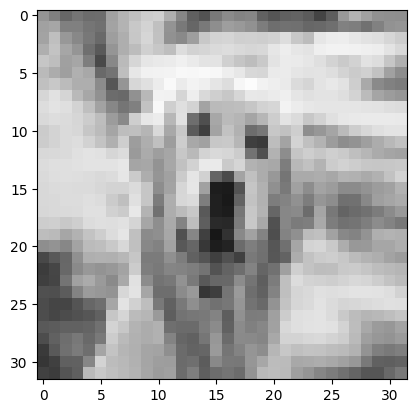

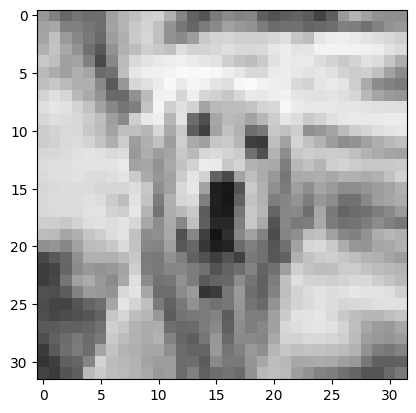

In [1]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

class FRQIEncoder:
    def __init__(self, image_path):
        self.image_path = image_path
        self.qubits = 12
        self.qc = QuantumCircuit(self.qubits, self.qubits)
        self.backend_sim = AerSimulator()  # Usamos AerSimulator aquí

    def image_normalization(self):
        image = Image.open(self.image_path).convert('LA')
        image = image.resize((32, 32))  # Redimensionar a 32x32
        image_array = np.array(image)[:, :, 0] / 255.0  # Escala de grises y normalización
        return np.arcsin(image_array.flatten())  # Normalización [0, π/2]

    def apply_hadamard(self):
        self.qc.h(range(2, self.qubits))  # Aplicar Hadamard a qubits 2 a 11

    def apply_frqi_encoding(self, pixel_data):
        for i, pixel in enumerate(pixel_data):
            if pixel != 0:
                self.c10mary(2 * pixel, format(i, '010b'), 0, 1, list(range(2, 12)))

    def c10mary(self, angle, bin_val, target, anc, controls):
        clist = [int(i) for i in bin_val]
        # Aplicar compuertas de control X cuando clist[i] es 0
        for i in range(len(clist)):
            if clist[i] == 0:
                self.qc.x(controls[-i-1])

        self.qc.mcry(angle, controls, target, anc)  # Rotación multicontrolada
        for i in range(len(clist)):
            if clist[i] == 0:
                self.qc.x(controls[-i-1])

    def run_simulation(self):
        self.qc.measure(range(self.qubits), range(self.qubits))
        transpiled_circuit = transpile(self.qc, self.backend_sim)
        result = self.backend_sim.run(transpiled_circuit, shots=10000000).result()
        return result.get_counts(self.qc)

    def reconstruct_image(self, counts, pixel_data_length):
        genimg = np.zeros(pixel_data_length)
        for i in range(pixel_data_length):
            try:
                genimg[i] = np.sqrt(counts[format(i, '010b') + '01'] / 10000000)
            except KeyError:
                pass
        return genimg * 32.0 * 255.0

    def calculate_mse(self, original, reconstructed):
        return mean_squared_error(original.flatten(), reconstructed.flatten())

    def save_images(self, original, reconstructed):
        np.savetxt('imagen_original.txt', original.reshape(32, 32), fmt='%d')
        np.savetxt('imagen_generada.txt', reconstructed.reshape(32, 32), fmt='%d')

    def show_images(self, original, reconstructed):
        plt.imshow(original.reshape(32, 32), cmap='gray', vmin=0, vmax=255)
        plt.savefig('Imagen.png')
        plt.show()
        plt.imshow(reconstructed.reshape(32, 32), cmap='gray', vmin=0, vmax=255)
        plt.savefig('Reconstruccion.png')
        plt.show()

    # Función para dibujar el circuito cuántico como texto y guardarlo en un archivo txt
    def draw_circuit_text(self, filename='circuito_32x32.txt'):
        with open(filename, 'w') as f:
            text_circuit = self.qc.draw(output='text')
            #print(text_circuit)
            f.write(str(text_circuit))

    def run(self):
        pixel_data = self.image_normalization()
        self.apply_hadamard()
        self.apply_frqi_encoding(pixel_data)
        counts = self.run_simulation()

        genimg = self.reconstruct_image(counts, len(pixel_data))
        original_img = np.sin(pixel_data) * 255.0

        mse = self.calculate_mse(original_img, genimg)
        print(f'Error cuadrático medio (MSE): {mse}')

        self.save_images(original_img, genimg)
        self.show_images(original_img, genimg)
        self.draw_circuit_text()  # Guardar el circuito como texto

# Ejecución del código optimizado
if __name__ == '__main__':
    frqi_encoder = FRQIEncoder('img/prueba2.jpeg')
    frqi_encoder.run()


# Codificacion FRQi 64x64

CAbe mencionar que en el ejemplo de 32 por 32 con las compuertas de Tofoli se agrega un qubit adicional para mejorar la presición de las rotaciones, sin embargo en este ejemplo solo se usarion los qubits necesarios para la posicion y el ancilla. El hecho de que funcione correctamente se debe a que el simulador (AerSimulator) y la implementación de rotaciones multicontroladas en Qiskit son lo suficientemente precisos para manejar las operaciones con solo 12 qubits, incluso sin el qubit adicional para aumentar la precisión.

/opt/anaconda3/envs/qiskit-stable/lib/python3.11/site-packages/numpy/linalg/linalg.py:2180: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/opt/anaconda3/envs/qiskit-stable/lib/python3.11/site-packages/numpy/linalg/linalg.py:2180: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


Error cuadrático medio (MSE): 6.788804136404719


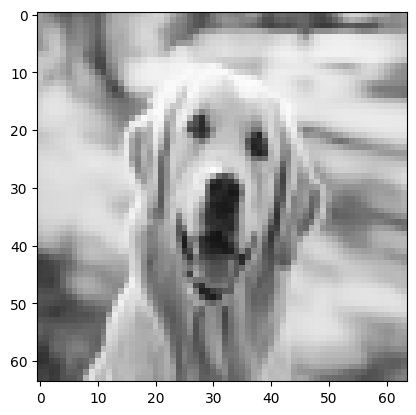

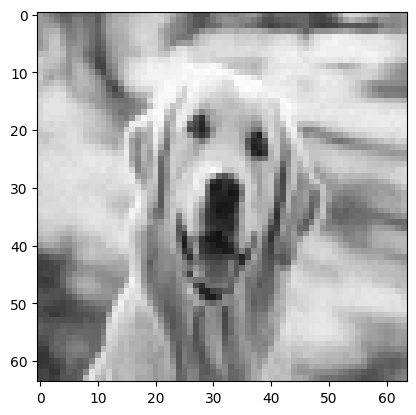

In [3]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

class FRQIEncoder:
    def __init__(self, image_path):
        self.image_path = image_path
        self.qubits = 13  # 12 para posiciones, 1 para la intensidad
        self.qc = QuantumCircuit(self.qubits, self.qubits)
        self.backend_sim = AerSimulator()  # Usamos AerSimulator aquí

    def image_normalization(self):
        image = Image.open(self.image_path).convert('LA')
        image = image.resize((64, 64))  # Redimensionar a 64x64
        image_array = np.array(image)[:, :, 0] / 255.0  # Escala de grises y normalización
        return np.arcsin(image_array.flatten())  # Normalización [0, π/2]

    def apply_hadamard(self):
        self.qc.h(range(1, self.qubits))  # Aplicar Hadamard a qubits 1 a 12

    def apply_frqi_encoding(self, pixel_data):
        for i, pixel in enumerate(pixel_data):
            if pixel != 0:
                self.c10mary(2 * pixel, format(i, '012b'), 0, [], list(range(1, 13)))

    def c10mary(self, angle, bin_val, target, anc, controls):
        clist = [int(i) for i in bin_val]
        # Aplicar compuertas de control X cuando clist[i] es 0
        for i in range(len(clist)):
            if clist[i] == 0:
                self.qc.x(controls[-i-1])

        self.qc.mcry(angle, controls, target, anc)  # Rotación multicontrolada
        for i in range(len(clist)):
            if clist[i] == 0:
                self.qc.x(controls[-i-1])

    def run_simulation(self):
        self.qc.measure(range(self.qubits), range(self.qubits))
        transpiled_circuit = transpile(self.qc, self.backend_sim)
        result = self.backend_sim.run(transpiled_circuit, shots=10000000).result()
        return result.get_counts(self.qc)

    def reconstruct_image(self, counts, pixel_data_length):
        genimg = np.zeros(pixel_data_length)
        for i in range(pixel_data_length):
            try:
                genimg[i] = np.sqrt(counts[format(i, '012b') + '1'] / 10000000)
            except KeyError:
                pass
        return genimg * 64.0 * 255.0

    def calculate_mse(self, original, reconstructed):
        return mean_squared_error(original.flatten(), reconstructed.flatten())

    def save_images(self, original, reconstructed):
        np.savetxt('imagen_original.txt', original.reshape(64, 64), fmt='%d')
        np.savetxt('imagen_generada.txt', reconstructed.reshape(64, 64), fmt='%d')

    def show_images(self, original, reconstructed):
        plt.imshow(original.reshape(64, 64), cmap='gray', vmin=0, vmax=255)
        plt.savefig('Imagen.png')
        plt.show()
        plt.imshow(reconstructed.reshape(64, 64), cmap='gray', vmin=0, vmax=255)
        plt.savefig('Reconstruccion.png')
        plt.show()

    # Función para dibujar el circuito cuántico como texto y guardarlo en un archivo txt
    def draw_circuit_text(self, filename='circuito_64x64.txt'):
        with open(filename, 'w') as f:
            text_circuit = self.qc.draw(output='text')
            f.write(str(text_circuit))

    def run(self):
        pixel_data = self.image_normalization()
        self.apply_hadamard()
        self.apply_frqi_encoding(pixel_data)
        counts = self.run_simulation()

        genimg = self.reconstruct_image(counts, len(pixel_data))
        original_img = np.sin(pixel_data) * 255.0

        mse = self.calculate_mse(original_img, genimg)
        print(f'Error cuadrático medio (MSE): {mse}')

        self.save_images(original_img, genimg)
        self.show_images(original_img, genimg)
        self.draw_circuit_text()  # Guardar el circuito como texto

# Ejecución del código optimizado
if __name__ == '__main__':
    frqi_encoder = FRQIEncoder('img/prueba2.jpeg')
    frqi_encoder.run()


# Reconstruccion de una imagen usando bloques de 64x64 pixeles
La imagen original de lena que estoy agregando es de 220x220 pixeles.
EL proceso tardo 20 minutos

/opt/anaconda3/envs/qiskit-stable/lib/python3.11/site-packages/numpy/linalg/linalg.py:2180: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/opt/anaconda3/envs/qiskit-stable/lib/python3.11/site-packages/numpy/linalg/linalg.py:2180: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


MSE del bloque: 6.652336396940098


/opt/anaconda3/envs/qiskit-stable/lib/python3.11/site-packages/numpy/linalg/linalg.py:2180: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/opt/anaconda3/envs/qiskit-stable/lib/python3.11/site-packages/numpy/linalg/linalg.py:2180: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


MSE del bloque: 6.80535956809305


/opt/anaconda3/envs/qiskit-stable/lib/python3.11/site-packages/numpy/linalg/linalg.py:2180: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/opt/anaconda3/envs/qiskit-stable/lib/python3.11/site-packages/numpy/linalg/linalg.py:2180: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


MSE del bloque: 6.716625469412746


/opt/anaconda3/envs/qiskit-stable/lib/python3.11/site-packages/numpy/linalg/linalg.py:2180: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/opt/anaconda3/envs/qiskit-stable/lib/python3.11/site-packages/numpy/linalg/linalg.py:2180: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


MSE del bloque: 6.705007199239232


/opt/anaconda3/envs/qiskit-stable/lib/python3.11/site-packages/numpy/linalg/linalg.py:2180: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/opt/anaconda3/envs/qiskit-stable/lib/python3.11/site-packages/numpy/linalg/linalg.py:2180: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


MSE del bloque: 6.867861440188761


/opt/anaconda3/envs/qiskit-stable/lib/python3.11/site-packages/numpy/linalg/linalg.py:2180: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/opt/anaconda3/envs/qiskit-stable/lib/python3.11/site-packages/numpy/linalg/linalg.py:2180: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


MSE del bloque: 6.565478415976826


/opt/anaconda3/envs/qiskit-stable/lib/python3.11/site-packages/numpy/linalg/linalg.py:2180: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/opt/anaconda3/envs/qiskit-stable/lib/python3.11/site-packages/numpy/linalg/linalg.py:2180: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


MSE del bloque: 6.645621079177495


/opt/anaconda3/envs/qiskit-stable/lib/python3.11/site-packages/numpy/linalg/linalg.py:2180: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/opt/anaconda3/envs/qiskit-stable/lib/python3.11/site-packages/numpy/linalg/linalg.py:2180: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


MSE del bloque: 6.74219663370971


/opt/anaconda3/envs/qiskit-stable/lib/python3.11/site-packages/numpy/linalg/linalg.py:2180: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/opt/anaconda3/envs/qiskit-stable/lib/python3.11/site-packages/numpy/linalg/linalg.py:2180: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


MSE del bloque: 6.850146624183838


/opt/anaconda3/envs/qiskit-stable/lib/python3.11/site-packages/numpy/linalg/linalg.py:2180: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/opt/anaconda3/envs/qiskit-stable/lib/python3.11/site-packages/numpy/linalg/linalg.py:2180: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


MSE del bloque: 6.775360627476845


/opt/anaconda3/envs/qiskit-stable/lib/python3.11/site-packages/numpy/linalg/linalg.py:2180: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/opt/anaconda3/envs/qiskit-stable/lib/python3.11/site-packages/numpy/linalg/linalg.py:2180: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


MSE del bloque: 6.717889254997889


/opt/anaconda3/envs/qiskit-stable/lib/python3.11/site-packages/numpy/linalg/linalg.py:2180: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/opt/anaconda3/envs/qiskit-stable/lib/python3.11/site-packages/numpy/linalg/linalg.py:2180: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


MSE del bloque: 6.710060295460659


/opt/anaconda3/envs/qiskit-stable/lib/python3.11/site-packages/numpy/linalg/linalg.py:2180: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/opt/anaconda3/envs/qiskit-stable/lib/python3.11/site-packages/numpy/linalg/linalg.py:2180: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


MSE del bloque: 6.543645773346313


/opt/anaconda3/envs/qiskit-stable/lib/python3.11/site-packages/numpy/linalg/linalg.py:2180: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/opt/anaconda3/envs/qiskit-stable/lib/python3.11/site-packages/numpy/linalg/linalg.py:2180: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


MSE del bloque: 6.717575876335896


/opt/anaconda3/envs/qiskit-stable/lib/python3.11/site-packages/numpy/linalg/linalg.py:2180: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/opt/anaconda3/envs/qiskit-stable/lib/python3.11/site-packages/numpy/linalg/linalg.py:2180: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


MSE del bloque: 6.512965444219048


/opt/anaconda3/envs/qiskit-stable/lib/python3.11/site-packages/numpy/linalg/linalg.py:2180: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/opt/anaconda3/envs/qiskit-stable/lib/python3.11/site-packages/numpy/linalg/linalg.py:2180: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


MSE del bloque: 6.80059756639657


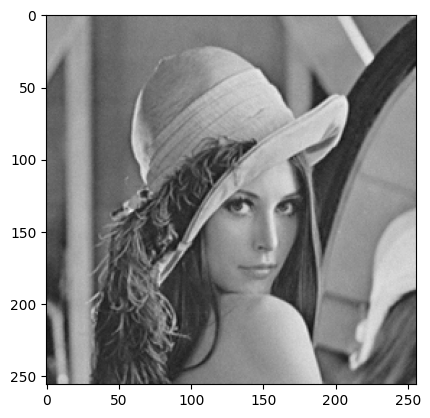

In [5]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

class FRQIEncoder:
    def __init__(self, image_block):
        self.image_block = image_block  # En vez de la ruta de imagen, usaremos un bloque
        self.qubits = 13  # 12 para posiciones, 1 ancilla
        self.qc = QuantumCircuit(self.qubits, self.qubits)
        self.backend_sim = AerSimulator()

    def image_normalization(self):
        image_array = np.array(self.image_block) / 255.0  # Escala de grises y normalización
        return np.arcsin(image_array.flatten())  # Normalización [0, π/2]

    def apply_hadamard(self):
        self.qc.h(range(1, self.qubits))  # Aplicar Hadamard a qubits 1 a 12

    def apply_frqi_encoding(self, pixel_data):
        for i, pixel in enumerate(pixel_data):
            if pixel != 0:
                self.c10mary(2 * pixel, format(i, '012b'), 0, [], list(range(1, 13)))

    def c10mary(self, angle, bin_val, target, anc, controls):
        clist = [int(i) for i in bin_val]
        for i in range(len(clist)):
            if clist[i] == 0:
                self.qc.x(controls[-i-1])

        self.qc.mcry(angle, controls, target, anc)
        for i in range(len(clist)):
            if clist[i] == 0:
                self.qc.x(controls[-i-1])

    def run_simulation(self):
        self.qc.measure(range(self.qubits), range(self.qubits))
        transpiled_circuit = transpile(self.qc, self.backend_sim)
        result = self.backend_sim.run(transpiled_circuit, shots=10000000).result()
        return result.get_counts(self.qc)

    def reconstruct_image(self, counts, pixel_data_length):
        genimg = np.zeros(pixel_data_length)
        for i in range(pixel_data_length):
            try:
                genimg[i] = np.sqrt(counts[format(i, '012b') + '1'] / 10000000)
            except KeyError:
                pass
        return genimg * 64.0 * 255.0

    def process_block(self):
        pixel_data = self.image_normalization()
        self.apply_hadamard()
        self.apply_frqi_encoding(pixel_data)
        counts = self.run_simulation()

        genimg = self.reconstruct_image(counts, len(pixel_data))
        original_img = np.sin(pixel_data) * 255.0

        mse = mean_squared_error(original_img, genimg)
        print(f'MSE del bloque: {mse}')
        return genimg.reshape(64, 64)

def divide_image_into_blocks(image_path, block_size=64):
    image = Image.open(image_path).convert('LA')
    width, height = image.size

    # Añadimos padding con ceros si la imagen no es múltiplo exacto del bloque
    padded_width = block_size * ((width + block_size - 1) // block_size)
    padded_height = block_size * ((height + block_size - 1) // block_size)

    image = image.resize((padded_width, padded_height))
    image_array = np.array(image)[:, :, 0]

    blocks = []
    for i in range(0, padded_height, block_size):
        for j in range(0, padded_width, block_size):
            block = image_array[i:i+block_size, j:j+block_size]
            blocks.append(block)

    return blocks, padded_width, padded_height

def reconstruct_from_blocks(blocks, padded_width, padded_height, block_size=64):
    full_image = np.zeros((padded_height, padded_width))

    idx = 0
    for i in range(0, padded_height, block_size):
        for j in range(0, padded_width, block_size):
            full_image[i:i+block_size, j:j+block_size] = blocks[idx]
            idx += 1

    return full_image

def process_large_image(image_path):
    blocks, padded_width, padded_height = divide_image_into_blocks(image_path)
    processed_blocks = []

    for block in blocks:
        encoder = FRQIEncoder(block)
        processed_block = encoder.process_block()
        processed_blocks.append(processed_block)

    full_image = reconstruct_from_blocks(processed_blocks, padded_width, padded_height)

    # Mostrar imagen procesada
    plt.imshow(full_image, cmap='gray', vmin=0, vmax=255)
    plt.show()

# Ejecución del código
if __name__ == '__main__':
    process_large_image('img/lena.png')
